# Application of KPLS for nonlinear regression.

## Numerical system taken from "Nonlinear Partial Least Squares: An Overview" by Roman Rosipal (https://www.researchgate.net/publication/266488967_Nonlinear_Partial_Least_Squares_An_Overview)


In [11]:
#%% packages
import numpy as np
import matplotlib.pyplot as plt

from KerNIPALS import KerNIPALS
from kernel_utils import Kernel, Kernel_test

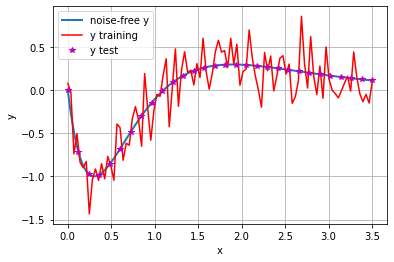

In [12]:
#%% generate data
def z(x):
    return 4.26 * (np.exp(-x) - 4 * np.exp(-2.0*x) + 3 * np.exp(-3.0*x))

X = np.linspace(0.0, 3.5, 100)[:,None] # for training
Xt = np.linspace(0, 3.5, 30)[:,None] # for test

Y_noiseFree = z(X)
Y = Y_noiseFree + np.random.normal(loc=0.0, scale=0.2, size=100)[:,None]
Yt = z(Xt)

plt.figure()
plt.plot(X, Y_noiseFree, linewidth=2, label='noise-free y')
plt.plot(X, Y, 'r', label='y training')
plt.plot(Xt, Yt, '*m', label='y test')
plt.xlabel('x'), plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [13]:
#%% center data
Y_center = Y - Y.mean()
Yt_center = Yt - Y.mean()

In [14]:
#%% KPLS fitting
N = X.shape[0]
Nt = Xt.shape[0]
n_latents = 8

# kernel matrices
K = Kernel(X, 1)
K_t = Kernel_test(X, Xt, 1)

# centralization of kernel matrices
M = np.eye(N) - np.ones((N,N))/N
Mt = np.ones((Nt, N))/N
K_t_bar = np.dot((K_t - np.dot(Mt, K)), M)
K_bar = np.dot(np.dot(M, K), M) 

# fit and predict
[Bf, T, U] = KerNIPALS(K_bar, Y_center, n_latents)

finding latent #: 1
finding latent #: 2
finding latent #: 3
finding latent #: 4
finding latent #: 5
finding latent #: 6
finding latent #: 7
finding latent #: 8


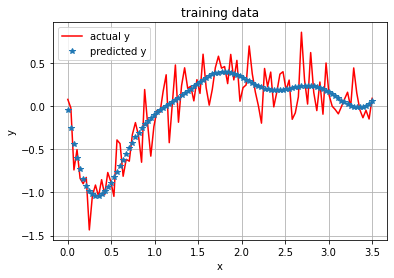

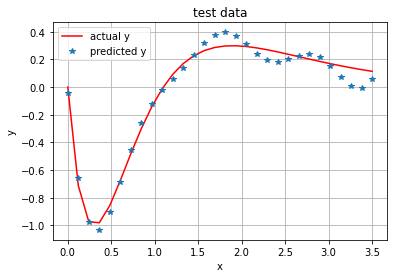

In [15]:
#%% KPLS predictions
Y_pred = np.dot(K_bar, Bf) + Y.mean()
Yt_pred = np.dot(K_t_bar, Bf) + Y.mean()

plt.figure()
plt.plot(X, Y, 'r', label='actual y')
plt.plot(X, Y_pred, '*', label='predicted y')
plt.xlabel('x'), plt.ylabel('y')
plt.title('training data')
plt.grid()
plt.legend()

plt.figure()
plt.plot(Xt, Yt, 'r', label='actual y')
plt.plot(Xt, Yt_pred, '*', label='predicted y')
plt.xlabel('x'), plt.ylabel('y')
plt.title('test data')
plt.grid()
plt.legend()

plt.show()